In [17]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.ops import unary_union
from scipy.spatial import Voronoi, voronoi_plot_2d
import numpy as np
from shapely.geometry import Polygon, Point


<Axes: >

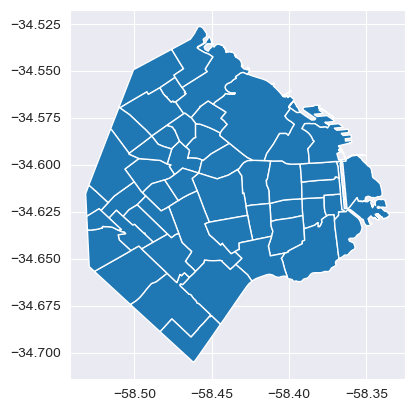

In [11]:

gdf = gpd.read_file("https://cdn.buenosaires.gob.ar/datosabiertos/datasets/ministerio-de-educacion/barrios/barrios.geojson")
gdf.plot()

/Users/santi/miniconda3/lib/python3.10/site-packages/shapely/set_operations.py:426: RuntimeWarning: invalid value encountered in unary_union
  return lib.unary_union(collections, **kwargs)


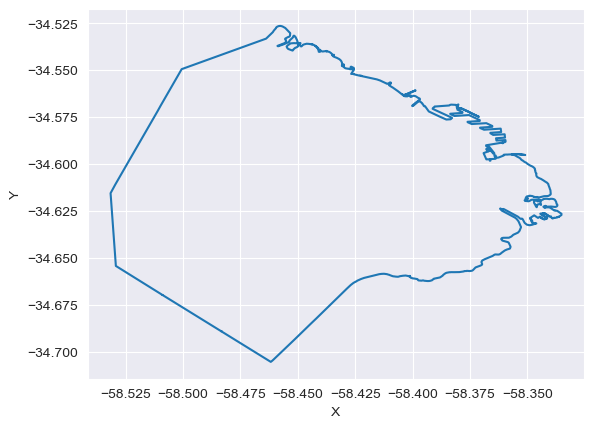

In [12]:
combined_polygon = unary_union(gdf["geometry"])

# Get the exterior ring of the combined polygon
outer_polygon = combined_polygon.exterior


# Plot the outer polygon
fig, ax = plt.subplots()
x, y = outer_polygon.xy
ax.plot(x, y)

# Add labels and grid
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.grid(True)

# Show the plot
plt.show()

In [18]:
# Define the polygon vertices
polygon_vertices = outer_polygon

# Define the number of subdivisions
num_subdivisions = 10  # Change this to 100 for 100 subdivisions

# Generate random points within the polygon
np.random.seed(0)
points = []

while len(points) < num_subdivisions:
    random_point = np.random.uniform(size=(2,))
    if Polygon(polygon_vertices).contains(Point(*random_point)):
        points.append(random_point)

# Compute Voronoi diagram
vor = Voronoi(points)

# Plot the Voronoi diagram
fig, ax = plt.subplots()
voronoi_plot_2d(vor, ax=ax)

# Plot the original polygon
x, y = polygon_vertices.T
ax.plot(x, y, 'r-')

# Add labels and grid
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.grid(True)

# Show the plot
plt.show()

KeyboardInterrupt: 